In [1]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/AirBnB

Mounted at /content/drive/
/content/drive/My Drive/AirBnB


# Importing Data

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\predator\anaconda4\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df =pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.shape

(48895, 16)

we have 48895 lines and 16 columns

In [6]:
df.describe

<bound method NDFrame.describe of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

     

In [7]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Missing Value

check the number of null values in each column and print them in descending order

In [8]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# assuming the dataset is stored in a variable called "data"

# count the number of null values in each column
null_counts = df.isnull().sum()

# sort the columns by the number of null values (in descending order)
null_counts = null_counts.sort_values(ascending=False)

# print the null value counts
print(null_counts)


last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Since we will be examining the factors that impact the listing price, columns such as "name" are not pertinent to our analysis.

In [10]:
df.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review'], axis=1, inplace=True)

columns such as name, host_id, host_name, latitude, longitude are not pertinent to our analysis.

In [11]:
# fills all missing values in the DataFrame df with the string '0'
df.fillna('0', inplace=True)

Therefore, we can safely fill those null values with 0.

In [12]:
df.shape

(48895, 9)

now, we have 48895 lines and 9 columns

## Outliers

In [13]:
df.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327
std,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


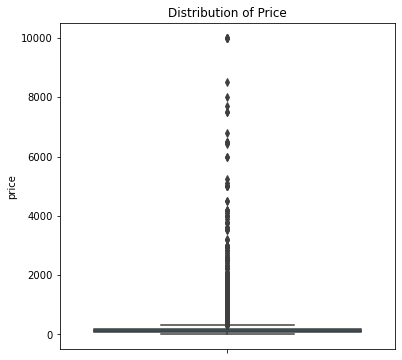

In [14]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df['price'])
plt.title("Distribution of Price")
plt.show()

<AxesSubplot:xlabel='price'>

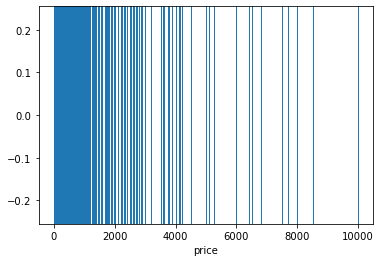

In [15]:
sns.rugplot(data=df, x='price', height=1)

There are so many outlier in the price. Let's drop them.

In [16]:
p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.01)
print(p1, p2)

799.0 30.0


The above code calculates two quantiles of the 'price' column in the DataFrame df using the quantile() method of pandas.

The first line computes the 99th percentile of the 'price' column and assigns it to the variable p1. This means that 99% of the values in the 'price' column are less than or equal to p1.

The second line computes the 1st percentile of the 'price' column and assigns it to the variable p2. This means that 1% of the values in the 'price' column are less than or equal to p2.

Printing p1 and p2 allows the user to see the values of these two quantiles, which can be useful for various purposes such as identifying outliers, setting thresholds for further analysis, or creating price range categories.

In [17]:
df = df[(df['price']<p1) & (df['price']>p2)]

The above code filters the DataFrame df to only include rows where the 'price' column is within the range defined by the variables p1 and p2.

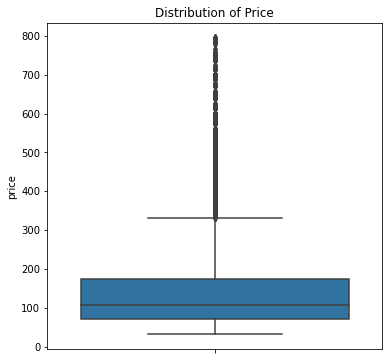

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df['price'])
plt.title("Distribution of Price")
plt.show()

we can see the minimum nights here

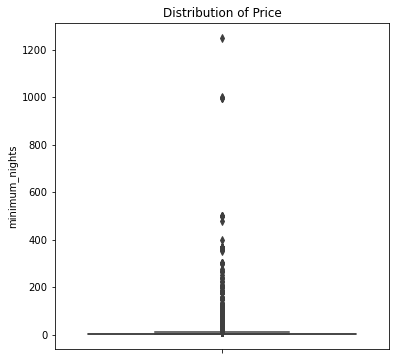

In [19]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df['minimum_nights'])
plt.title("Distribution of Price")
plt.show()

In [20]:
m1 = df['minimum_nights'].quantile(0.99)
print(m1)

40.0


In [21]:
df = df[(df['minimum_nights']<m1)]

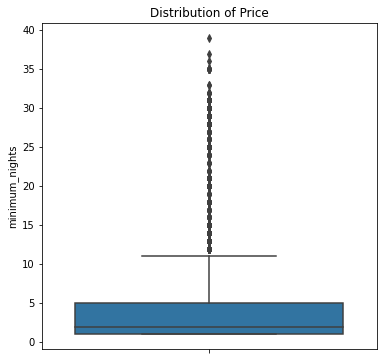

In [22]:
plt.figure(figsize=(6,6))
sns.boxplot(y=df['minimum_nights'])
plt.title("Distribution of Price")
plt.show()

In [23]:
df['reviews_per_month']

0        0.21
1        0.38
2           0
3        4.64
4         0.1
         ... 
48890       0
48891       0
48892       0
48893       0
48894       0
Name: reviews_per_month, Length: 47262, dtype: object

In [24]:
# traiter les informations categorielle de la colonne reviews_per_month
df['reviews_per_month'] = df['reviews_per_month'].apply(lambda s: 'No' if s == '0' else 'yes')

In [25]:
# creating a new column in the DataFrame df named 'is_zero'
# takes each value in the 'availability_365' column, checks if it's equal to 0, and if so, 
#sets the corresponding value in the new 'is_zero' column to 'zero', otherwise it sets it to 'nonzero'.
df['is_zero'] = df['availability_365'].apply(lambda s: 'zero' if s == 0 else 'nonzero')

In [26]:
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,is_zero
0,Brooklyn,Kensington,Private room,149,1,9,yes,6,365,nonzero
1,Manhattan,Midtown,Entire home/apt,225,1,45,yes,2,355,nonzero
2,Manhattan,Harlem,Private room,150,3,0,No,1,365,nonzero
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,yes,1,194,nonzero
4,Manhattan,East Harlem,Entire home/apt,80,10,9,yes,1,0,zero


In [27]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'is_zero'],
      dtype='object')

In [28]:
df['neighbourhood'].value_counts()

Williamsburg          3855
Bedford-Stuyvesant    3602
Harlem                2597
Bushwick              2380
Hell's Kitchen        1916
                      ... 
Richmondtown             1
Woodrow                  1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 220, dtype: int64

In [29]:
nb = df['neighbourhood'].value_counts()

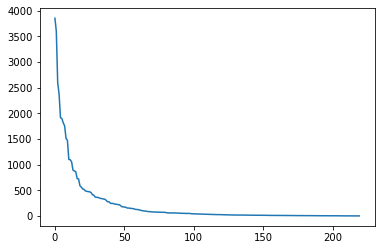

In [30]:
plt.plot(range(len(nb)), nb)

In [31]:
df['neighbourhood'] = df['neighbourhood'].apply(lambda s: s if str(s) in nb[:25] else 'others')

In [32]:
nb

Williamsburg          3855
Bedford-Stuyvesant    3602
Harlem                2597
Bushwick              2380
Hell's Kitchen        1916
                      ... 
Richmondtown             1
Woodrow                  1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 220, dtype: int64

In [33]:
df['neighbourhood_group'].value_counts()

Manhattan        20955
Brooklyn         19488
Queens            5458
Bronx             1009
Staten Island      352
Name: neighbourhood_group, dtype: int64

In [34]:
df['room_type'].value_counts()

Entire home/apt    24666
Private room       21703
Shared room          893
Name: room_type, dtype: int64

## Data Correlation

<AxesSubplot:>

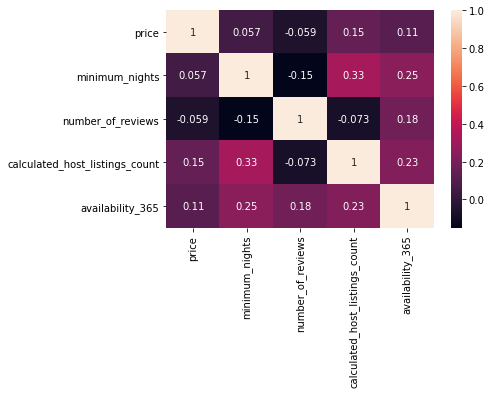

In [35]:
# data correlation
sns.heatmap(data=df.corr(), annot=True)

## Categorical data visualization

In [36]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

<Axes: xlabel='room_type', ylabel='price'>

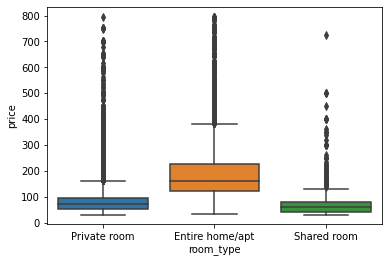

In [48]:
# visualize the distribution of the 'price' column 
# across different values of the 'room_type' column
sns.boxplot(data=df, x='room_type', y='price')

Text(0.5, 1.0, 'Numbers in Each Room Types')

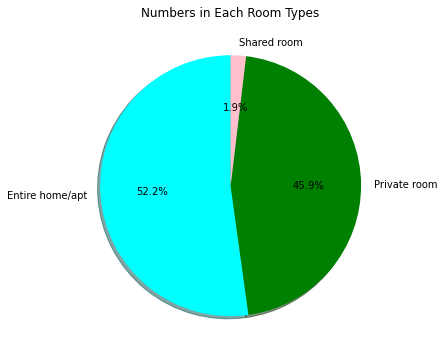

In [43]:
plt.figure(figsize=(6,6))
numbers = df['room_type'].value_counts()
plt.pie(numbers.values, labels=numbers.index, colors=['cyan', 'green', 'pink'], autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Numbers in Each Room Types')

In [37]:
n_group = df.groupby('neighbourhood_group').describe()
n_group.xs('price',axis = 1)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1009.0,87.756194,70.341288,32.0,50.00,70.0,100.00,680.0
Brooklyn,19488.0,117.488147,85.900570,31.0,60.00,94.0,150.00,795.0
Manhattan,20955.0,173.128323,115.189412,31.0,95.00,149.0,215.00,795.0
Queens,5458.0,96.124038,69.272127,31.0,53.25,75.0,113.75,750.0
Staten Island,352.0,97.303977,76.070489,31.0,50.75,75.0,110.00,700.0


Bronx: With 1,009 listings, the average price in the Bronx is approximately $87.76, showcasing a standard deviation of 70.34. Prices range from 32 to 680, with the majority of listings falling between 50 and 100.

Brooklyn: Home to 19,488 listings, Brooklyn has an average price of 117.49 and a standard deviation of 85.90. Prices in this neighborhood group span from 31 to 795, with most listings priced between 60 and 150.

Manhattan: Featuring 20,955 listings, Manhattan boasts the highest average price of 73.13, accompanied by a standard deviation of 115.19. Prices range from 31 to 795, and the majority of listings are concentrated between 95 and 215.

Queens: With 5,458 listings, Queens has an average price of 96.12 and a standard deviation of 69.27. Prices vary from 31 to 750, with most listings falling within the 53.25 to 113.75 range.

Staten Island: The least represented neighborhood group with 352 listings, Staten Island has an average price of 97.30 and a standard deviation of 76.07. Prices in this area range from 31 to 700, and the majority of listings are priced between 50.75 and 110.

Text(0.5, 1.0, 'Numbers in Each Neigbourhoods')

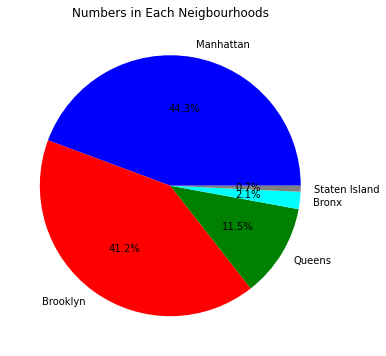

In [38]:
plt.figure(figsize=(6,6))
numbers = df['neighbourhood_group'].value_counts()
plt.pie(numbers.values, labels=numbers.index, colors=['b', 'r', 'g', 'cyan', 'gray'], autopct='%1.1f%%')
plt.title('Numbers in Each Neigbourhoods')

Manhattan has the most house. Brooklyn follows Manhattan with a big portion. Mostly the rooms are distributed in Brooklyn and Manhattan.

<Axes: xlabel='neighbourhood_group', ylabel='price'>

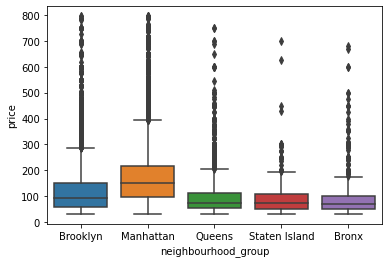

In [49]:
# visualize the distribution of the 'price' column 
# across different values of the 'neighbourhood_group' column
sns.boxplot(data=df, x='neighbourhood_group', y='price')

The data suggests that the average price of accommodations in Manhattan is higher than in other locations. We can further analyze to determine which specific room is the most expensive and which room type is the least expensive.

C:\Users\predator\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

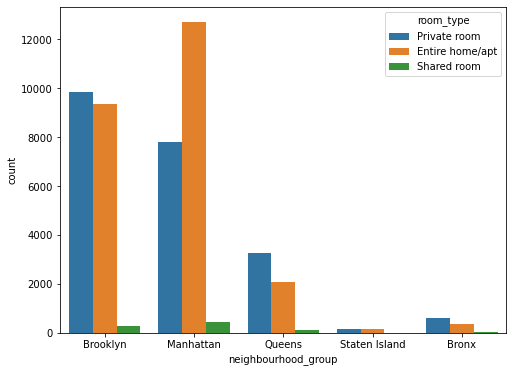

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(df['neighbourhood_group'],hue=df['room_type'])

<AxesSubplot:xlabel='is_zero', ylabel='price'>

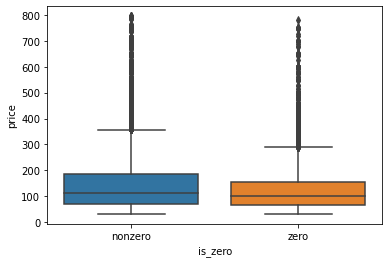

In [40]:
# visualize the distribution of the 'price' column 
# across different values of the 'is_zero' column
sns.boxplot(data=df, x='is_zero', y='price')

<AxesSubplot:xlabel='reviews_per_month', ylabel='price'>

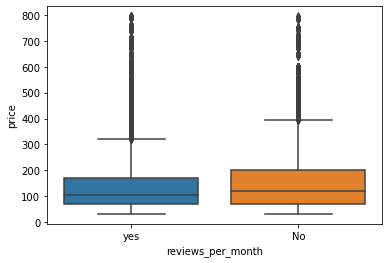

In [41]:
# visualize the distribution of the 'price' column
# across different values of the 'reviews_per_month' column
sns.boxplot(data=df, x='reviews_per_month', y='price')

# Data Preprocessing

## Reduce dataset

In [53]:
# code randomly samples 10,000 rows from the DataFrame df using the sample() method 
# and assigns the result to a new DataFrame also named df.
df = df.sample(n=10000, random_state=42)

## Preprocessing

In [54]:
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,is_zero
5431,Manhattan,Financial District,Entire home/apt,275,3,9,yes,1,0,zero
8197,Manhattan,Upper East Side,Entire home/apt,175,3,0,No,1,0,zero
23318,Brooklyn,others,Entire home/apt,105,2,22,yes,1,0,zero
31398,Brooklyn,Bushwick,Private room,35,14,4,yes,1,0,zero
19113,Queens,others,Private room,43,3,69,yes,1,283,nonzero


In [55]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
is_zero                           0
dtype: int64

In [56]:
X_num = df[['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]
X_cat = df.drop(['minimum_nights', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'price'], axis=1)

In [57]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [58]:
le = LabelEncoder()
for i in X_cat.columns:
  X_cat[i] = le.fit_transform(X_cat[i])

In [59]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y=df['price']

In [60]:
X.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group,neighbourhood,room_type,reviews_per_month,is_zero
5431,-0.313973,-0.334785,-0.182844,-0.858443,2,9,0,1,1
8197,-0.313973,-0.535346,-0.182844,-0.858443,2,20,0,0,1
23318,-0.435119,-0.045086,-0.182844,-0.858443,1,25,0,1,1
31398,1.018629,-0.446207,-0.182844,-0.858443,1,2,1,1,1
19113,-0.313973,1.002287,-0.182844,1.300122,3,25,1,1,0


In [61]:
X.shape

(10000, 9)

# Models


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [64]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

## Decision tree

### Simple decision tree

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Créer un modèle d'arbre de décision
dt = DecisionTreeRegressor()

# Entraîner le modèle sur les données d'apprentissage
dt.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = dt.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)

Erreur quadratique moyenne :  12711.1952758402
Coefficient de détermination (R²) :  -0.1687403742900384
Score de variance expliquée :  -0.16640605432493172
Erreur maximale :  665.0
Erreur absolue moyenne :  66.9982646945647


### Decision tree with GridSearch

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Créer un modèle d'arbre de décision
dt = DecisionTreeRegressor()

# Définir les hyperparamètres à tester
param_grid = {
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
dt_gs = GridSearchCV(dt, param_grid, scoring='neg_mean_squared_error', cv=5)
dt_gs.fit(X_train, y_train)

# Utiliser les meilleurs hyperparamètres pour entraîner le modèle
dt_best = dt_gs.best_estimator_
dt_best.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = dt_best.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Erreur quadratique moyenne :  7030.188468943191
Coefficient de détermination (R²) :  0.3536040534174647
Score de variance expliquée :  0.3536391129923788
Erreur maximale :  642.8356164383562
Erreur absolue moyenne :  51.4052767498826


### Decision tree with Kfold and GridSearch

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold

# Créer un modèle d'arbre de décision
dt = DecisionTreeRegressor()

# Définir les hyperparamètres à tester
param_grid = {
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Utiliser GridSearchCV avec une validation croisée KFold pour trouver les meilleurs hyperparamètres
cv = KFold(n_splits=5, shuffle=True, random_state=42)
dt_gs = GridSearchCV(dt, param_grid, scoring='neg_mean_squared_error', cv=cv)
dt_gs.fit(X_train, y_train)

# Utiliser les meilleurs hyperparamètres pour entraîner le modèle
dt_best = dt_gs.best_estimator_
dt_best.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = dt_best.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Erreur quadratique moyenne :  7040.810980927625
Coefficient de détermination (R²) :  0.3526273585934788
Score de variance expliquée :  0.35265890510540565
Erreur maximale :  642.8356164383562
Erreur absolue moyenne :  51.45831536776878


## Random Forest

### Simple Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Créer un modèle de forêt aléatoire avec 100 arbres
rf = RandomForestRegressor()

# Entraîner le modèle sur les données d'apprentissage
rf.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = rf.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Erreur quadratique moyenne :  6497.048120534112
Coefficient de détermination (R²) :  0.4026240422404719
Score de variance expliquée :  0.40381053179767024
Erreur maximale :  640.91
Erreur absolue moyenne :  51.07977130266481


### Random Forest with GridSearch

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Définir les hyperparamètres à tester avec la grille de recherche
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer un modèle de forêt aléatoire
rf = RandomForestRegressor(random_state=1)

# Entraîner le modèle sur les données d'apprentissage
rf.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = rf.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)

Meilleurs hyperparamètres :  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Erreur quadratique moyenne :  6078.592218044534
Coefficient de détermination (R²) :  0.44109928374896323
Score de variance expliquée :  0.44109946116412735
Erreur maximale :  641.6568373712605
Erreur absolue moyenne :  47.944824175526385


### Random forest with Kfold and Grid search

In [72]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Définir les hyperparamètres à tester avec la grille de recherche
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer un modèle de forêt aléatoire
rf = RandomForestRegressor(random_state=1)

# Définir la validation croisée KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Créer un objet GridSearchCV pour faire la recherche de grille avec validation croisée
grid_search = GridSearchCV(rf, param_grid, scoring='neg_mean_squared_error', cv=cv)

# Entraîner le modèle sur les données avec la recherche de grille avec validation croisée
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Entraîner le modèle de forêt aléatoire sur les données avec les meilleurs hyperparamètres trouvés
best_rf = RandomForestRegressor(random_state=1, **grid_search.best_params_)
best_rf.fit(X_train, y_train)

predictions = best_rf.predict(X_test)

# Calculer les métriques de performance avec le meilleur modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)
me = max_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Afficher les résultats avec le meilleur modèle
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Meilleurs hyperparamètres :  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Erreur quadratique moyenne :  6078.592218044534
Coefficient de détermination (R²) :  0.44109928374896323
Score de variance expliquée :  0.44109946116412735
Erreur maximale :  641.6568373712605
Erreur absolue moyenne :  47.944824175526385


## AdaBoost

### Simple AdaBoost

In [73]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Créer un modèle Adaboost avec 100 arbres de décision
ada = AdaBoostRegressor()

# Entraîner le modèle sur les données d'apprentissage
ada.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = ada.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Erreur quadratique moyenne :  8457.166285060772
Coefficient de détermination (R²) :  0.22239950886273518
Score de variance expliquée :  0.2888191773584421
Erreur maximale :  630.7982885085574
Erreur absolue moyenne :  64.18933140017215


### AdaBoodt with GridSearch

In [74]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Définir les hyperparamètres à tester avec la grille de recherche
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Créer un modèle AdaBoost
ada = AdaBoostRegressor()

# Créer un objet GridSearchCV pour faire la recherche de grille sans validation croisée
grid_search = GridSearchCV(ada, param_grid, scoring='neg_mean_squared_error')

# Entraîner le modèle sur les données avec la recherche de grille sans validation croisée
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Entraîner le modèle AdaBoost sur les données avec les meilleurs hyperparamètres trouvés
best_ada = AdaBoostRegressor(**grid_search.best_params_)
best_ada.fit(X_train, y_train)

predictions = best_ada.predict(X_test)

# Calculer les métriques de performance avec le meilleur modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)
me = max_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Afficher les résultats avec le meilleur modèle
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Meilleurs hyperparamètres :  {'learning_rate': 0.1, 'n_estimators': 50}
Erreur quadratique moyenne :  7951.110698894279
Coefficient de détermination (R²) :  0.2689291689264066
Score de variance expliquée :  0.32529313340611776
Erreur maximale :  625.3353751914242
Erreur absolue moyenne :  62.936655854479355


### AdaBoost with KFold and GridSearch

In [75]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Définir les hyperparamètres à tester avec la grille de recherche
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Créer un modèle AdaBoost
ada = AdaBoostRegressor()

# Définir la validation croisée KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Créer un objet GridSearchCV pour faire la recherche de grille avec validation croisée
grid_search = GridSearchCV(ada, param_grid, scoring='neg_mean_squared_error', cv=cv)

# Entraîner le modèle sur les données avec la recherche de grille avec validation croisée
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Entraîner le modèle AdaBoost sur les données avec les meilleurs hyperparamètres trouvés
best_ada = AdaBoostRegressor(**grid_search.best_params_)
best_ada.fit(X_train, y_train)

predictions = best_ada.predict(X_test)

# Calculer les métriques de performance avec le meilleur modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)
me = max_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Afficher les résultats avec le meilleur modèle
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Meilleurs hyperparamètres :  {'learning_rate': 0.1, 'n_estimators': 50}
Erreur quadratique moyenne :  7895.007280488384
Coefficient de détermination (R²) :  0.27408763977070916
Score de variance expliquée :  0.325529996534778
Erreur maximale :  628.6034236804564
Erreur absolue moyenne :  62.42698562935926


## XGBoost

### Simple XGBoost

In [76]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Convertir les données en format spécifique pour XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Définir les paramètres du modèle
params = {'objective':'reg:squarederror', 'eval_metric':'rmse', 'seed':1}

# Entraîner le modèle sur les données d'apprentissage
xgb_model = xgb.train(params, dtrain)

# Faire des prédictions sur les données de test
y_pred = xgb_model.predict(dtest)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Erreur quadratique moyenne :  6143.192398517417
Coefficient de détermination (R²) :  0.43515957174968456
Score de variance expliquée :  0.4366007168009327
Erreur maximale :  642.7522048950195
Erreur absolue moyenne :  47.404398782730105


### XGBoost with GridSearch

In [77]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Convertir les données en format spécifique pour XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Définir les paramètres à tester avec la grille de recherche
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Créer un objet XGBoost avec les paramètres par défaut
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', seed=1)

# Créer un objet GridSearchCV pour faire la recherche de grille sans validation croisée
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error')

# Entraîner le modèle sur les données avec la recherche de grille sans validation croisée
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Entraîner le modèle XGBoost sur les données avec les meilleurs hyperparamètres trouvés
best_xgb = xgb.XGBRegressor(objective='reg:squarederror', seed=1, **grid_search.best_params_)
best_xgb.fit(X_train, y_train)

predictions = best_xgb.predict(X_test)

# Calculer les métriques de performance avec le meilleur modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)
me = max_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Afficher les résultats avec le meilleur modèle
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Meilleurs hyperparamètres :  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Erreur quadratique moyenne :  5902.883455206422
Coefficient de détermination (R²) :  0.4572549576088223
Score de variance expliquée :  0.4572685534691625
Erreur maximale :  632.6454010009766
Erreur absolue moyenne :  47.31676564534505


### XGBoost with KFold and GridSearch

In [78]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error

# Convertir les données en format spécifique pour XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Définir les paramètres à tester avec la grille de recherche
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Créer un objet XGBoost avec les paramètres par défaut
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', seed=1)

# Définir la validation croisée KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Créer un objet GridSearchCV pour faire la recherche de grille avec validation croisée
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=cv)

# Entraîner le modèle sur les données avec la recherche de grille avec validation croisée
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Entraîner le modèle XGBoost sur les données avec les meilleurs hyperparamètres trouvés
best_xgb = xgb.XGBRegressor(objective='reg:squarederror', seed=1, **grid_search.best_params_)
best_xgb.fit(X_train, y_train)

predictions = best_xgb.predict(X_test)

# Calculer les métriques de performance avec le meilleur modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)
me = max_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Afficher les résultats avec le meilleur modèle
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Meilleurs hyperparamètres :  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Erreur quadratique moyenne :  5902.883455206422
Coefficient de détermination (R²) :  0.4572549576088223
Score de variance expliquée :  0.4572685534691625
Erreur maximale :  632.6454010009766
Erreur absolue moyenne :  47.31676564534505


## Gradient Boosting

### Simple Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Définir le modèle de Gradient Boosting Regressor avec des hyperparamètres par défaut
gbr = GradientBoostingRegressor(random_state=1)

# Entraîner le modèle sur les données d'apprentissage
gbr.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = gbr.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Erreur quadratique moyenne :  6261.87756168091
Coefficient de détermination (R²) :  0.42847760416890834
Score de variance expliquée :  0.42853086452947364
Erreur maximale :  649.8447512701152
Erreur absolue moyenne :  48.342658779729284


### Gradient Boosting with GridSearch

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Définir les hyperparamètres à tester avec la grille de recherche
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer un objet GradientBoostingRegressor avec les hyperparamètres par défaut
gbr = GradientBoostingRegressor(random_state=1)

# Créer un objet GridSearchCV pour faire la recherche de grille sans validation croisée
grid_search = GridSearchCV(gbr, param_grid, scoring='neg_mean_squared_error')

# Entraîner le modèle sur les données avec la recherche de grille sans validation croisée
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Entraîner le modèle Gradient Boosting Regressor sur les données avec les meilleurs hyperparamètres trouvés
best_gbr = GradientBoostingRegressor(random_state=1, **grid_search.best_params_)
best_gbr.fit(X_train, y_train)

predictions = best_gbr.predict(X_test)

# Calculer les métriques de performance avec le meilleur modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)
me = max_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Afficher les résultats avec le meilleur modèle
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Meilleurs hyperparamètres :  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Erreur quadratique moyenne :  6131.375387633395
Coefficient de détermination (R²) :  0.44038855490822315
Score de variance expliquée :  0.4404194897679884
Erreur maximale :  631.5544896834217
Erreur absolue moyenne :  47.55539378523403


### Gradient Boosting with KFold and GridSearch

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Définir les hyperparamètres à tester avec la grille de recherche
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer un objet GradientBoostingRegressor avec les hyperparamètres par défaut
gbr = GradientBoostingRegressor(random_state=1)

# Définir la validation croisée KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Créer un objet GridSearchCV pour faire la recherche de grille avec validation croisée
grid_search = GridSearchCV(gbr, param_grid, scoring='neg_mean_squared_error', cv=cv)

# Entraîner le modèle sur les données avec la recherche de grille avec validation croisée
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Entraîner le modèle Gradient Boosting Regressor sur les données avec les meilleurs hyperparamètres trouvés
best_gbr = GradientBoostingRegressor(random_state=1, **grid_search.best_params_)
best_gbr.fit(X_train, y_train)

predictions = best_gbr.predict(X_test)

# Calculer les métriques de performance avec le meilleur modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)
me = max_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Afficher les résultats avec le meilleur modèle
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Meilleurs hyperparamètres :  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Erreur quadratique moyenne :  6141.606096445135
Coefficient de détermination (R²) :  0.43945479675764587
Score de variance expliquée :  0.4394972697281002
Erreur maximale :  633.2533683975986
Erreur absolue moyenne :  47.463144406011835


### Simple LGBM

In [84]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Définir le modèle de LGBM Regressor avec des hyperparamètres par défaut
lgbm = LGBMRegressor(random_state=1)

# Entraîner le modèle sur les données d'apprentissage
lgbm.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = lgbm.predict(X_test)

# Calculer les métriques de performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Erreur quadratique moyenne :  6088.698464147912
Coefficient de détermination (R²) :  0.44428368337678037
Score de variance expliquée :  0.4442875295841836
Erreur maximale :  636.913646881294
Erreur absolue moyenne :  46.856258502529776


### LGBM with GridSearch

In [82]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Définir les hyperparamètres à tester avec la grille de recherche
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_child_samples': [1, 5, 10],
    'reg_alpha': [0.0, 0.1, 1.0],
    'reg_lambda': [0.0, 0.1, 1.0],
}

# Créer un objet LGBMRegressor avec les hyperparamètres par défaut
lgbm = LGBMRegressor(random_state=1)

# Créer un objet GridSearchCV pour faire la recherche de grille sans validation croisée
grid_search = GridSearchCV(lgbm, param_grid, scoring='neg_mean_squared_error')

# Entraîner le modèle sur les données avec la recherche de grille sans validation croisée
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Entraîner le modèle LGBMRegressor sur les données avec les meilleurs hyperparamètres trouvés
best_lgbm = LGBMRegressor(random_state=1, **grid_search.best_params_)
best_lgbm.fit(X_train, y_train)

predictions = best_lgbm.predict(X_test)

# Calculer les métriques de performance avec le meilleur modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)
me = max_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Afficher les résultats avec le meilleur modèle
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Meilleurs hyperparamètres :  {'learning_rate': 0.1, 'max_depth': 4, 'min_child_samples': 1, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1.0}
Erreur quadratique moyenne :  6090.671928271078
Coefficient de détermination (R²) :  0.4441035650444354
Score de variance expliquée :  0.4441537389683149
Erreur maximale :  632.9770971218413
Erreur absolue moyenne :  47.366223765322054


### LGBM with KFold and GridSearch


In [83]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, max_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold

# Définir les hyperparamètres à tester avec la grille de recherche
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_child_samples': [1, 5, 10],
    'reg_alpha': [0.0, 0.1, 1.0],
    'reg_lambda': [0.0, 0.1, 1.0],
}

# Créer un objet LGBMRegressor avec les hyperparamètres par défaut
lgbm = LGBMRegressor(random_state=1)

# Créer un objet GridSearchCV pour faire la recherche de grille avec validation croisée KFold
grid_search = GridSearchCV(lgbm, param_grid, scoring='neg_mean_squared_error', cv=KFold(n_splits=5, shuffle=True, random_state=1))

# Entraîner le modèle sur les données avec la recherche de grille et validation croisée KFold
grid_search.fit(X, y)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Entraîner le modèle LGBMRegressor sur les données avec les meilleurs hyperparamètres trouvés
best_lgbm = LGBMRegressor(random_state=1, **grid_search.best_params_)
best_lgbm.fit(X, y)

# Faire des prédictions sur les données de test
predictions = best_lgbm.predict(X_test)

# Calculer les métriques de performance avec le meilleur modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)
me = max_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Afficher les résultats avec le meilleur modèle
print("Erreur quadratique moyenne : ", mse)
print("Coefficient de détermination (R²) : ", r2)
print("Score de variance expliquée : ", evs)
print("Erreur maximale : ", me)
print("Erreur absolue moyenne : ", mae)


Meilleurs hyperparamètres :  {'learning_rate': 0.1, 'max_depth': 4, 'min_child_samples': 1, 'n_estimators': 200, 'reg_alpha': 1.0, 'reg_lambda': 1.0}
Erreur quadratique moyenne :  4987.844126828547
Coefficient de détermination (R²) :  0.5447588047965808
Score de variance expliquée :  0.5447705483140342
Erreur maximale :  550.4631510153426
Erreur absolue moyenne :  43.43103542130416
